In [59]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sns.set_context('talk')

In [60]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

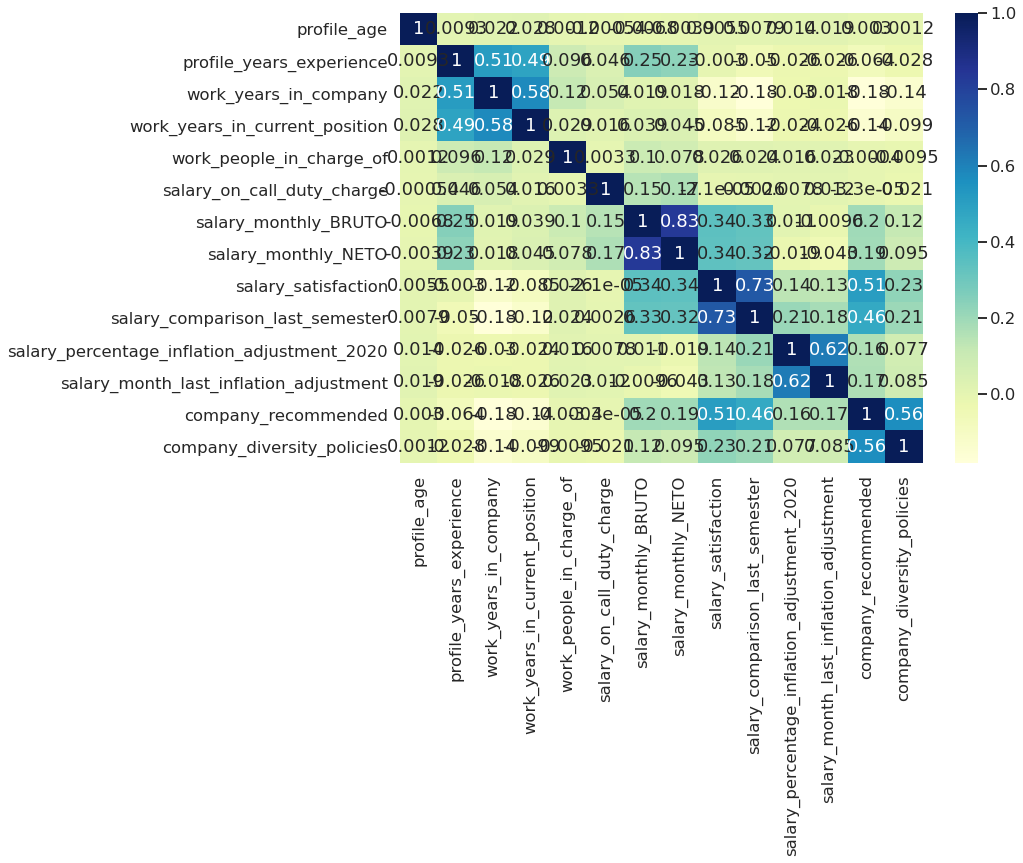

In [61]:
corr = df[df.columns].corr()
#.corr es una funcion que correlaciona las variables una con otra y luego la grafico con el heatmap de seaborn
sns.heatmap(corr, cmap="YlGnBu", annot = True)
sns.set(rc={'figure.figsize':(15,12)})

Mostramos este grafico para mostrar un primer panorama de correlacion entre las variables numericas para descubrir patrones. 
Si la corr tiende a +/-1 la correlacion es mayor

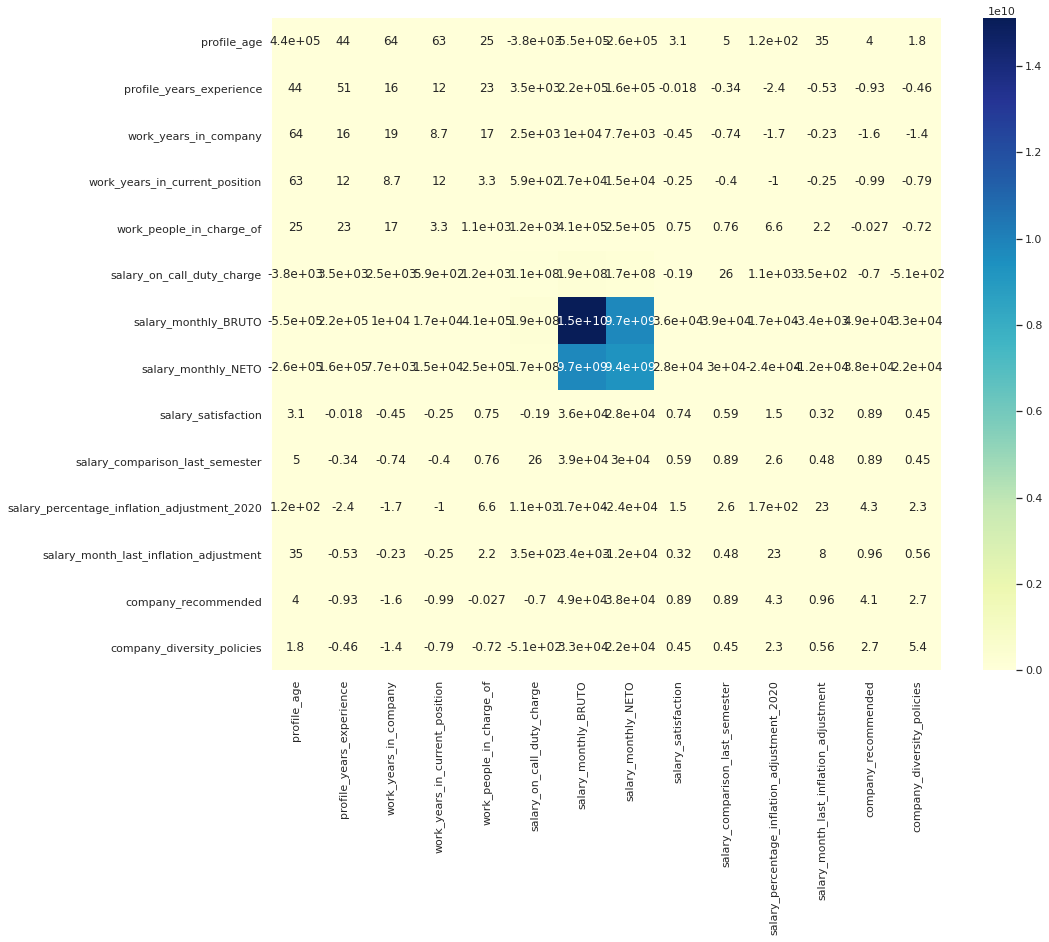

In [62]:
cov = df[df.columns].cov()
#.corr es una funcion que correlaciona las variables una con otra y luego la grafico con el heatmap de seaborn
sns.heatmap(cov, cmap="YlGnBu", annot = True)
sns.set(rc={'figure.figsize':(15,12)})

si la covarianza es mayor a cero la relacion es directa y si es menor a cero es relacion inversa

In [63]:
def remove_outlier(df_in, col_name, iqr_factor):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

In [64]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(df, "salary_monthly_NETO", iqr_factor)
df_main_inliers = df_main_inliers[df_main_inliers["salary_monthly_NETO"] > 24000]
# Filtramos por el mínimo vital y móvil

display(len(df_main_inliers) / len(df))


0.8720262510254306

In [65]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "salary_monthly_BRUTO", iqr_factor)
display(len(df_main_inliers) / len(df))

0.8662838392124692

In [66]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "profile_years_experience", iqr_factor)
display(len(df_main_inliers) / len(df))

0.8654634946677605

# Densidad conjunta

Pongo un par de visualizaciones entre las variables elegidas de densidad conjunta

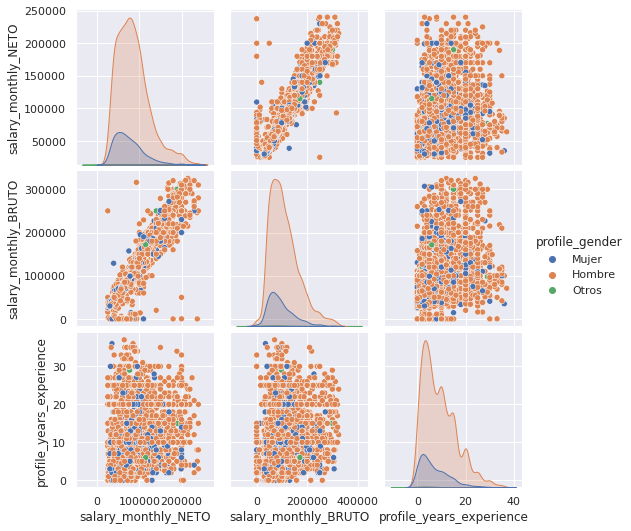

In [67]:
sns.pairplot(
    df_main_inliers,
    x_vars=["salary_monthly_NETO", "salary_monthly_BRUTO", "profile_years_experience"],
    y_vars=["salary_monthly_NETO", "salary_monthly_BRUTO", "profile_years_experience"],
    hue="profile_gender"
)

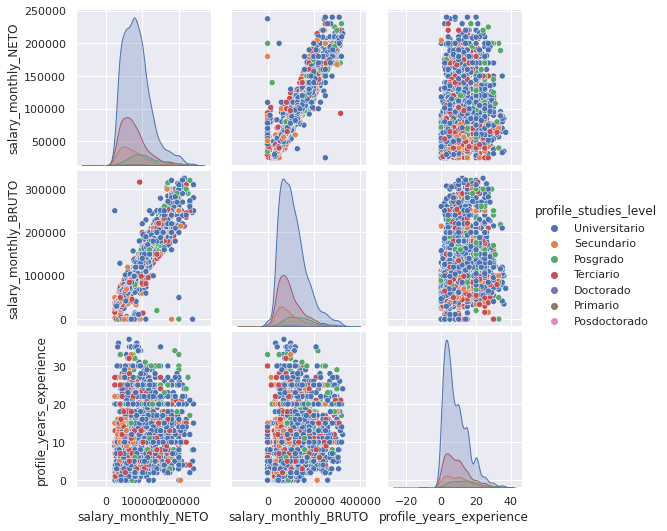

In [68]:
sns.pairplot(
    df_main_inliers,
    x_vars=["salary_monthly_NETO", "salary_monthly_BRUTO", "profile_years_experience"],
    y_vars=["salary_monthly_NETO", "salary_monthly_BRUTO", "profile_years_experience"],
    hue="profile_studies_level"
)

In [69]:
order=["Primario",'Secundario','Terciario','Universitario','Posgrado','Doctorado','Posdoctorado']

<AxesSubplot:xlabel='profile_studies_level', ylabel='salary_monthly_NETO'>

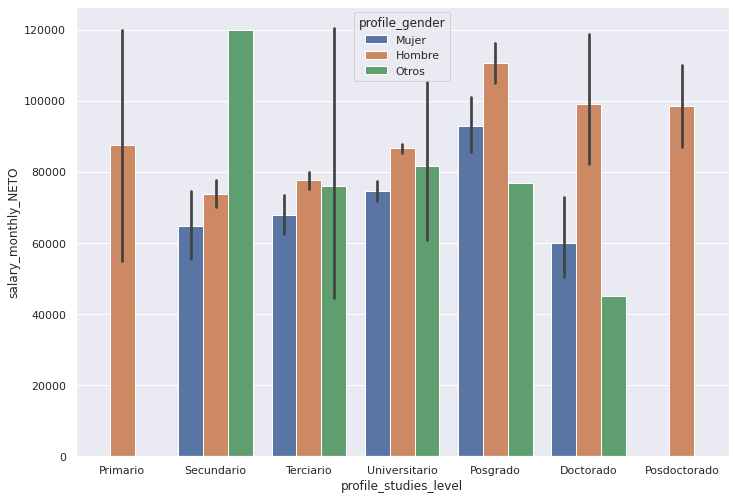

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_main_inliers, x='profile_studies_level', y='salary_monthly_NETO', hue='profile_gender',order=order)

<AxesSubplot:xlabel='profile_studies_level', ylabel='salary_monthly_BRUTO'>

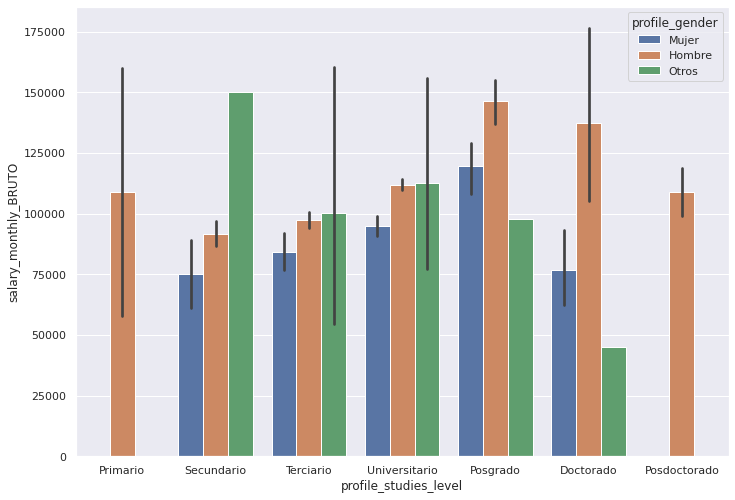

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_main_inliers, x='profile_studies_level', y='salary_monthly_BRUTO', hue='profile_gender',order=order)

<AxesSubplot:xlabel='profile_studies_level', ylabel='profile_years_experience'>

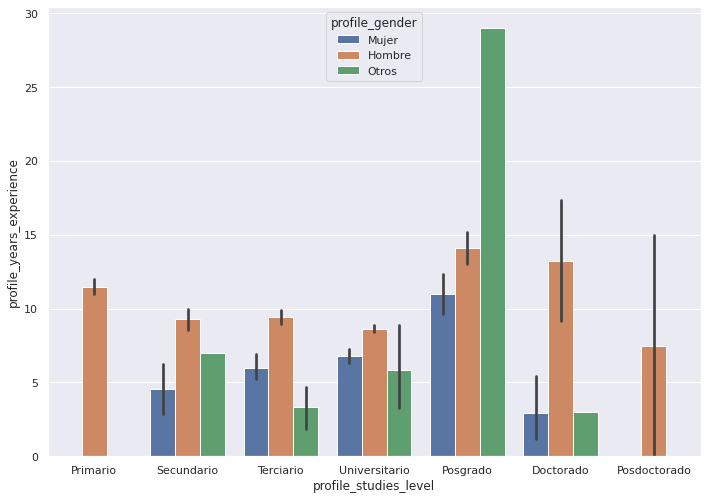

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_main_inliers, x='profile_studies_level', y='profile_years_experience', hue='profile_gender',order=order)

# Asociacion

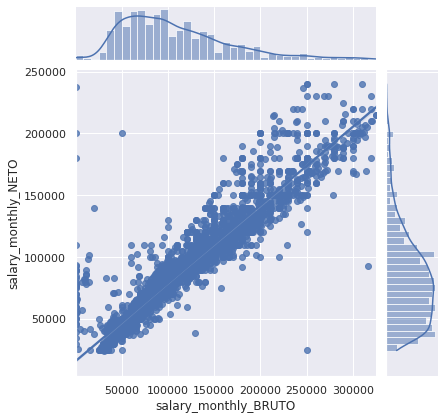

In [73]:
sns.jointplot(x='salary_monthly_BRUTO',y='salary_monthly_NETO', data=df_main_inliers, kind='reg')

In [74]:
sub_df=df_main_inliers[['salary_monthly_BRUTO','salary_monthly_NETO']]
sub_df.corr()

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.943156
salary_monthly_NETO,0.943156,1.000000


Podemos ver como estan correlacionadas las variables en forma positiva

# Densidad condicional


In [75]:
df_main_inliers['profile_studies_level'].value_counts()
#elijo las dos poblaciones mas numerosas

Universitario    3567
Terciario        1019
Secundario        386
Posgrado          278
Doctorado          21
Posdoctorado        2
Primario            2
Name: profile_studies_level, dtype: int64

In [76]:
sub_df_univ=df_main_inliers[df_main_inliers['profile_studies_level']=='Universitario']
sub_df_terc=df_main_inliers[df_main_inliers['profile_studies_level']=='Terciario']


<ipython-input-77-a6da3e4871a4>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


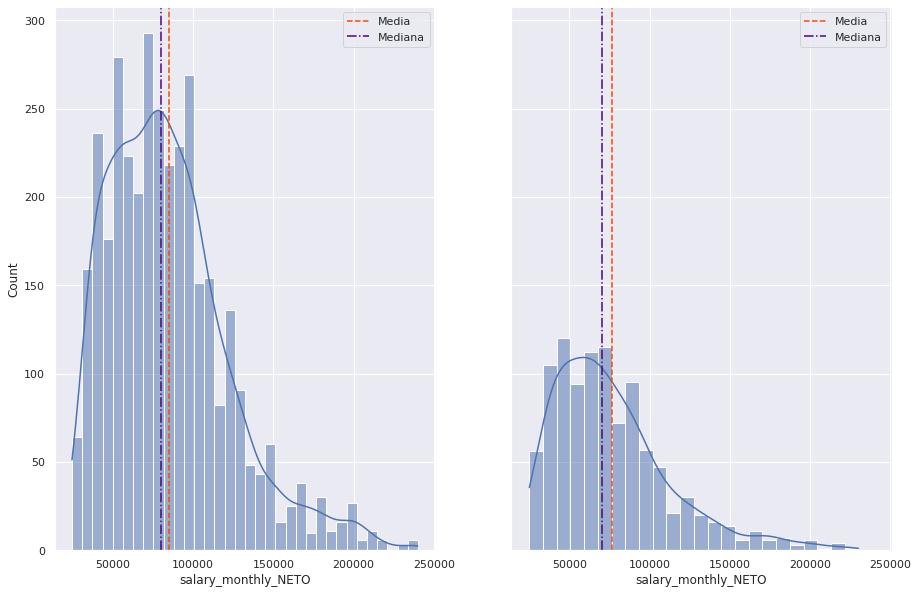

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10), sharey=True,sharex=True)

sns.histplot(data=sub_df_univ,x='salary_monthly_NETO' ,ax=ax[0],kde=True)
ax[0].axvline(sub_df_univ['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
ax[0].axvline(sub_df_univ['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

sns.histplot(data=sub_df_terc,x='salary_monthly_NETO' , ax=ax[1],kde=True)
ax[1].axvline(sub_df_terc['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
ax[1].axvline(sub_df_terc['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

ax[0].legend()
ax[1].legend()
fig.show()

In [78]:
df_corr=df_main_inliers['profile_studies_level'].replace(to_replace=['Primario','Secundario','Terciario','Universitario',
                                                      'Posgrado', 'Doctorado','Posdoctorado'],
                                            value=[0,1,2,3,4,5,6],inplace=True)



In [79]:
df_main_inliers['profile_studies_level']

0       3
1       3
2       1
3       4
4       3
       ..
6088    1
6089    3
6090    2
6091    3
6094    2
Name: profile_studies_level, Length: 5275, dtype: int64

In [82]:
df_corr=df_main_inliers[['profile_studies_level','salary_monthly_NETO']]
df_corr.corr()

,profile_studies_level,salary_monthly_NETO
profile_studies_level,1.000000,0.151092
salary_monthly_NETO,0.151092,1.000000


In [83]:
print('la media de la poblacion universitaria es ',sub_df_univ['salary_monthly_NETO'].mean())
print('la mediana de la poblacion universitaria es ',sub_df_univ['salary_monthly_NETO'].median())
print()
print('la media de la poblacion terciaria es ',sub_df_terc['salary_monthly_NETO'].mean())
print('la mediana de la poblacion terciaria es ',sub_df_terc['salary_monthly_NETO'].median())

la media de la poblacion universitaria es  84669.5078609476
la mediana de la poblacion universitaria es  80000.0

la media de la poblacion terciaria es  76360.85593719332
la mediana de la poblacion terciaria es  70000.0


In [84]:
print("Varianza salario neto univ", sub_df_univ.salary_monthly_NETO.var())
print("Varianza salario neto terc", sub_df_terc.salary_monthly_NETO.var())
print()

print("Desviacion estandar salario neto univ", sub_df_univ.salary_monthly_NETO.std())
print("Desviacion estandar salario neto terc", sub_df_terc.salary_monthly_NETO.std())
print()
print("Coeficiente de variación salario neto univ",
      stats.variation(sub_df_univ.salary_monthly_NETO))
print("Coeficiente de variación salario neto terc",
      stats.variation(sub_df_terc.salary_monthly_NETO))

Varianza salario neto univ 1437073760.3065922
Varianza salario neto terc 1326615859.7559383

Desviacion estandar salario neto univ 37908.755720896355
Desviacion estandar salario neto terc 36422.73822430074

Coeficiente de variación salario neto univ 0.4476634208826695
Coeficiente de variación salario neto terc 0.47674769469094663


Con el coeficiente de variacion podemos determinar que la media es lo suficientemente representativa de la muestra y homogeneo ya que tomamos como un umbral que sea menor a 0,80

# Densidad conjunta condicional

<AxesSubplot:xlabel='profile_years_experience', ylabel='salary_monthly_NETO'>

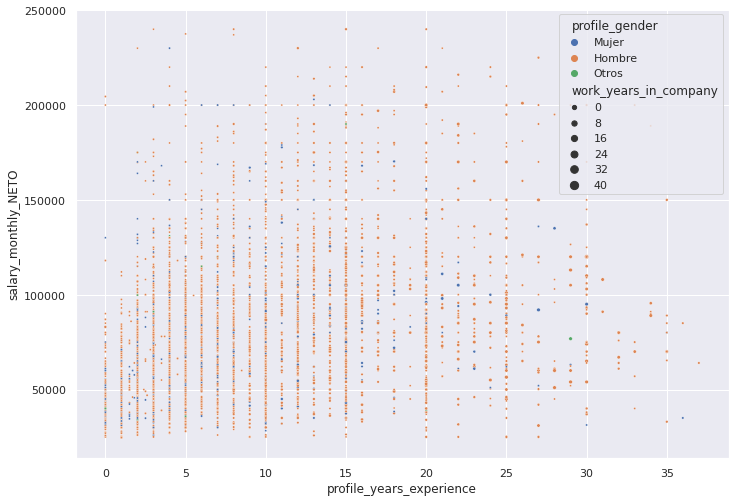

In [85]:
sns.scatterplot(data=df_main_inliers, x='profile_years_experience',y='salary_monthly_NETO',hue='profile_gender',
                marker='.',  size='work_years_in_company')